In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train, Y_train),(X_test, Y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 28s 0us/step


In [4]:
#NORMALIZE PIXEL VALUES TO RANGE 0-1
X_train,X_test = X_train/255.0, X_test/255.0

In [5]:
print(f"Shape of X_train : {X_train.shape}")
print(f"Shape of Y_train : {Y_train.shape}")

Shape of X_train : (50000, 32, 32, 3)
Shape of Y_train : (50000, 1)


In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

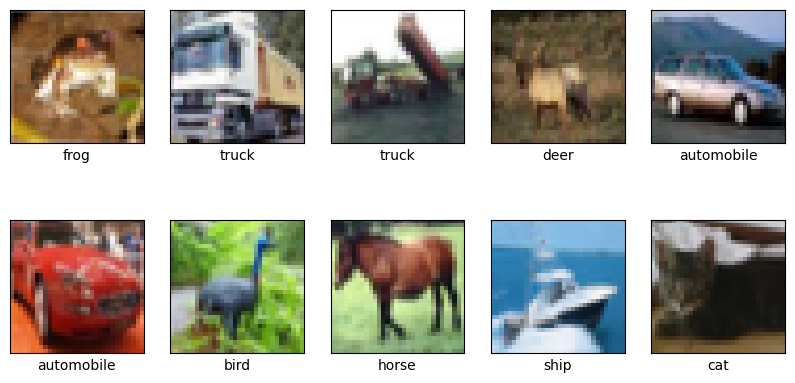

In [7]:
plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[i])
  plt.xlabel(class_names[Y_train[i][0]])
plt.show()

In [8]:
# Build the ANN model
ann_model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

C:\Users\InterbestPC-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Compile the model
ann_model.compile(optimizer='adam',
                  loss='SparseCategoricalCrossentropy',
                  metrics=['accuracy'])

In [10]:
ann_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,841,162 (7.02 MB)

 Trainable params: 1,841,162 (7.02 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the model
ann_history = ann_model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2768 - loss: 2.0169 - val_accuracy: 0.3839 - val_loss: 1.7270
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3970 - loss: 1.6794 - val_accuracy: 0.4147 - val_loss: 1.6068
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4220 - loss: 1.6024 - val_accuracy: 0.4477 - val_loss: 1.5521
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4400 - loss: 1.5487 - val_accuracy: 0.4518 - val_loss: 1.5412
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4522 - loss: 1.5216 - val_accuracy: 0.4458 - val_loss: 1.5485
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4643 - loss: 1.4916 - val_accuracy: 0.4582 - val_loss: 1.5122
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4679 - loss: 1.4815 - val_accuracy: 0.4596 - val_loss: 1.4982
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4808 - loss: 1.4402 - 

In [12]:
ann_test_loss, ann_test_acc = ann_model.evaluate(X_test, Y_test)
print(f"Test_acuracy of ANN : {ann_test_acc}")
print(f"Test_loss of ANN : {ann_test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.4651 - loss: 1.4902
Test_acuracy of ANN : 0.47269999980926514
Test_loss of ANN : 1.4883935451507568


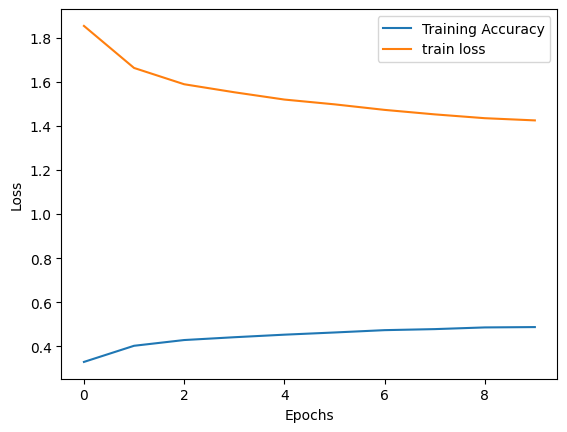

In [13]:
plt.plot(ann_history.history['accuracy'], label='Training Accuracy')
plt.plot(ann_history.history['loss'], label='train loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()